In [32]:
import os 
import numpy as np 
import pandas as pd 
import scanpy as sc
import anndata
import copy
import desc
import matplotlib.pyplot as pl
# following line ensures the pl plots inline 
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [33]:
from importlib import reload
import GE_functions
reload(GE_functions)

<module 'GE_functions' from '/data/jlu/Chaperone_Analysis/notebooks/GE_functions.py'>

The goal of this notebook is to generate a list of top enriched genes for every cell type clusters 

In [34]:
adata = anndata.read_csv('../files/Brann/GSE151346_MOE_all_counts.csv')
meta_data = pd.read_table('../files/Brann/GSE151346_MOE_metadata.tsv')
meta_data = meta_data.set_index('index')
# transpose used to flip obs and vars.
adata_brann = adata.copy().transpose()

In [35]:
# Subset the adata by only cells included in metadata. Attach meta info onto adata
adata_brann = adata_brann[meta_data.index, :]
adata_brann.obs = adata_brann.obs.join(meta_data).dropna(axis = 0)

In [36]:
# Plotting the provided UMAP coordinates on metafile to visualize 
fig = px.scatter(adata_brann.obs, x='UMAP_1', y= 'UMAP_2', color='leiden_name')
fig.update_traces(marker = dict(size = 3, opacity = 0.5))
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    })
fig.show()

/data/jlu/anaconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning:

The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.

... storing 'orig_ident' as categorical
/data/jlu/anaconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning:

The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.

... storing 'leiden_name' as categorical


/data/jlu/anaconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning:

overflow encountered in expm1



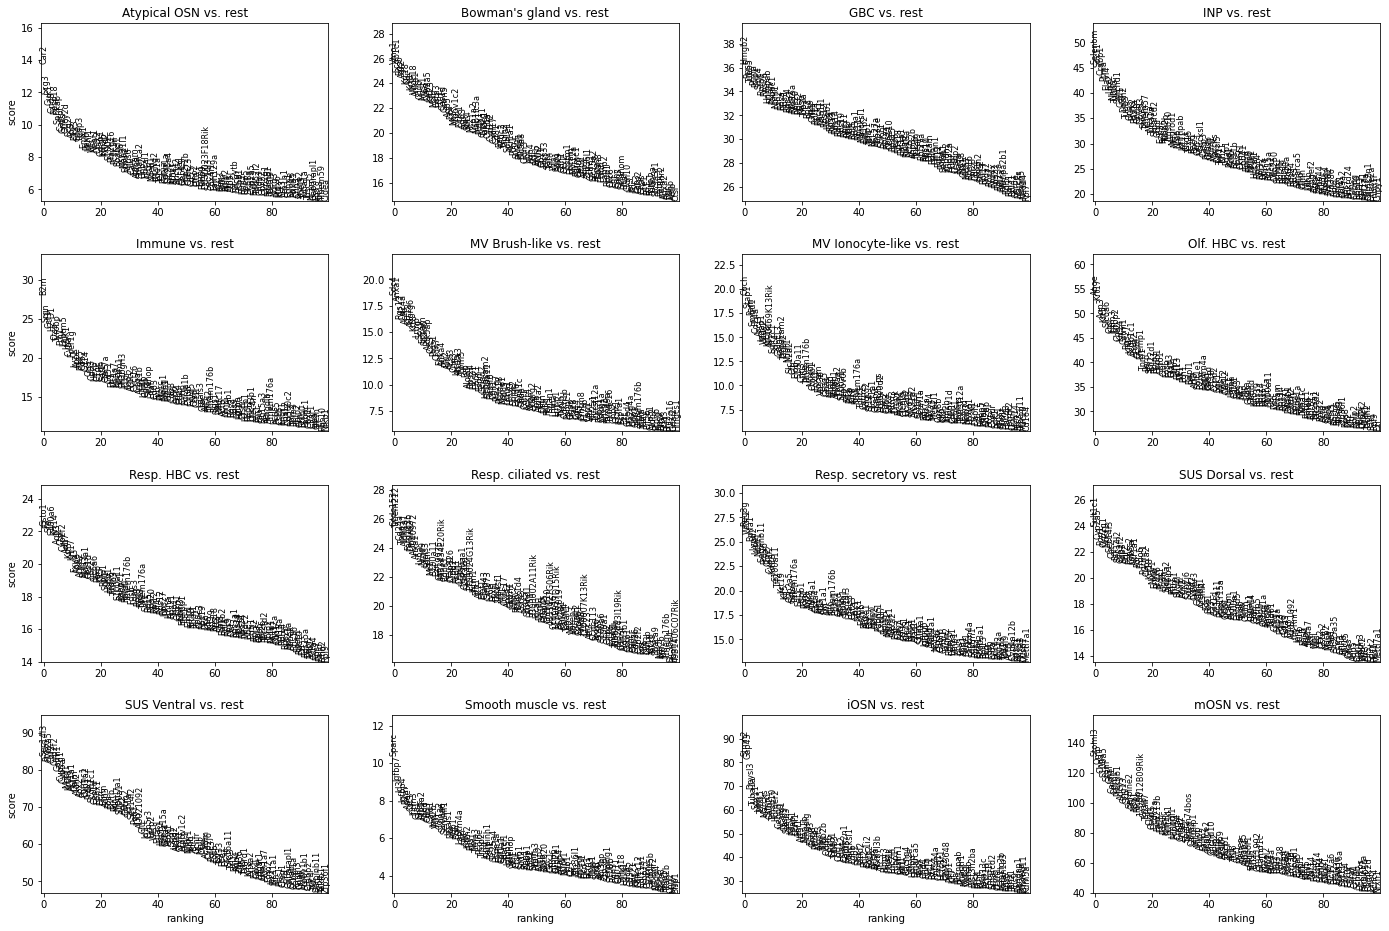

In [37]:
sc.tl.rank_genes_groups(adata_brann, 'leiden_name', method='wilcoxon')
sc.pl.rank_genes_groups(adata_brann, n_genes=100, sharey=False)

In [42]:
result = adata_brann.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key: result[key][group]
    for group in groups for key in ['genes', 'pvals']}).to_csv('../output/brann/Celltype_enriched_genes.csv')

KeyError: 'genes'

In [46]:
key: result['names']['mOSN']

In [41]:
{group + '_' + key: result[key][group]
    for group in groups for key in ['names', 'pvals']}

{'Atypical OSN_names': array(['Car2', 'Scg3', 'Guk1', ..., 'Stoml3', 'Gnal', 'Cmip'],
       dtype=object),
 'Atypical OSN_pvals': array([4.88127246e-43, 1.37459757e-32, 2.15667980e-29, ...,
        4.09958415e-15, 3.19862185e-15, 2.20374442e-15]),
 "Bowman's gland_names": array(['Vmo1', 'Scgb1c1', 'Rgs5', ..., 'Atf5', 'Fstl5', 'Map1b'],
       dtype=object),
 "Bowman's gland_pvals": array([5.60708992e-144, 2.37253334e-137, 3.35113988e-134, ...,
        1.19277072e-070, 4.96730680e-079, 2.07531828e-097]),
 'GBC_names': array(['Hmgb2', 'Rps5', 'Tubb5', ..., 'Calm1', 'Omp', 'Fstl5'],
       dtype=object),
 'GBC_pvals': array([1.76150372e-288, 3.10730031e-270, 2.21003326e-264, ...,
        3.22409416e-217, 1.92358260e-217, 6.34484472e-234]),
 'INP_names': array(['Selenom', 'Sox11', 'Crabp1', ..., 'Omp', 'Atp1b1', 'Calm1'],
       dtype=object),
 'INP_pvals': array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        4.38115528e-264, 3.54826560e-268, 1.02882840e-291]),
 'Immune